In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

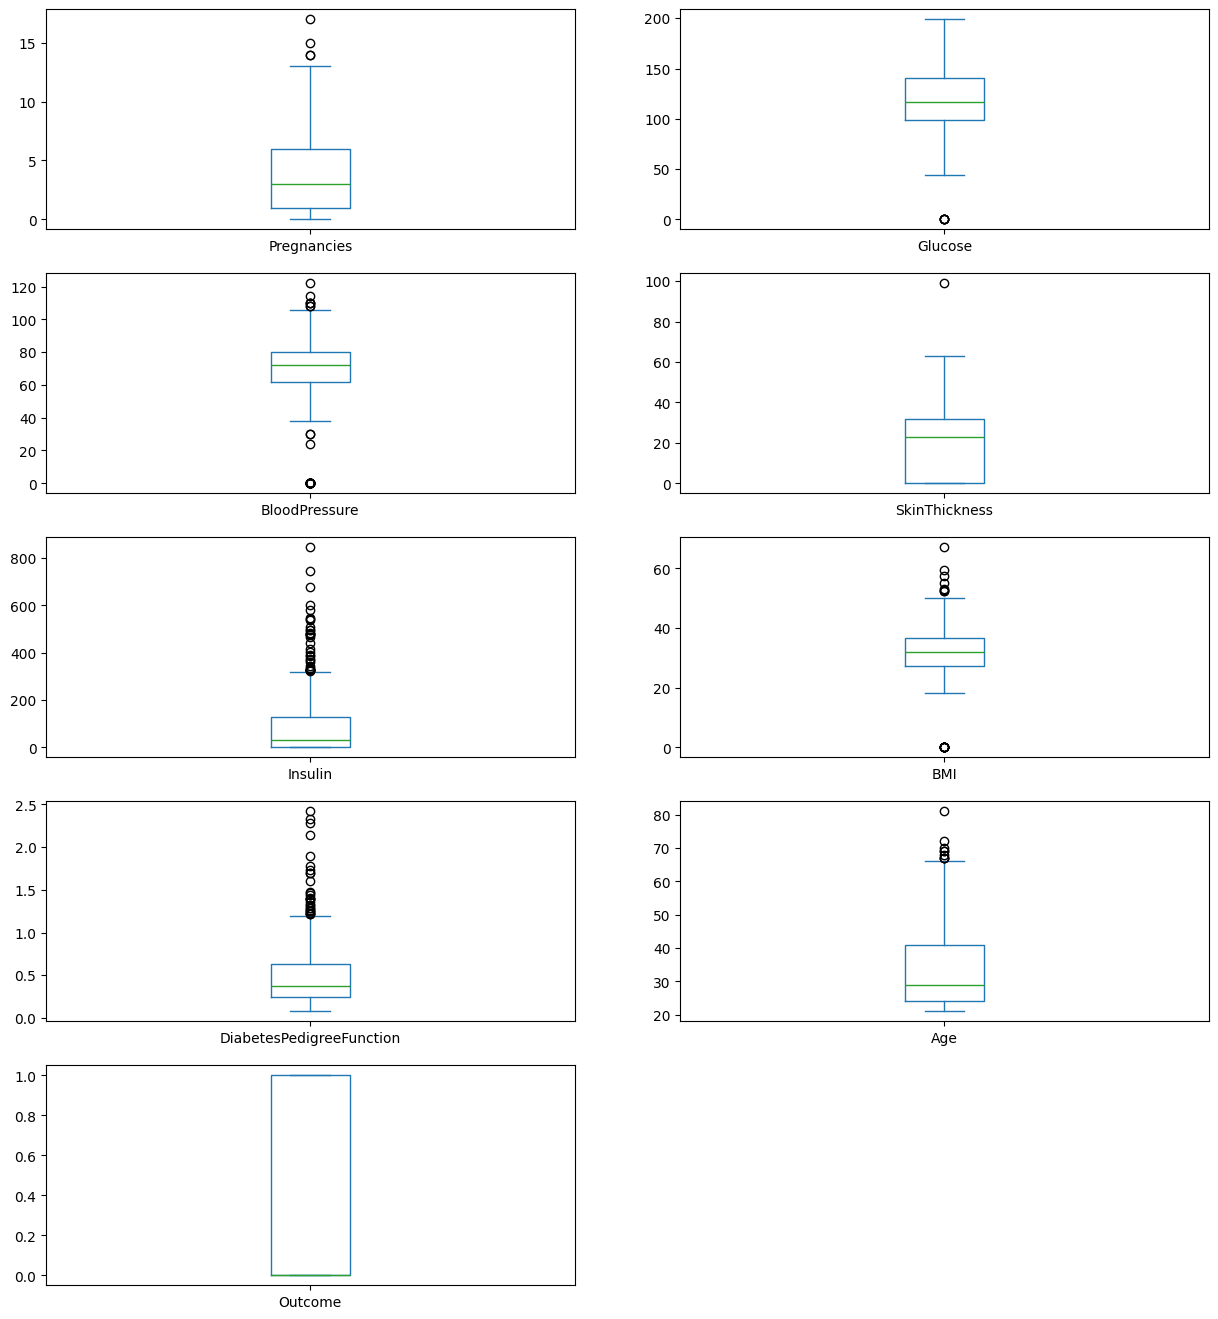

In [5]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) 
plt.show()

In [6]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [7]:
df = treat_outliers_all(df , df.iloc[: , 0::])

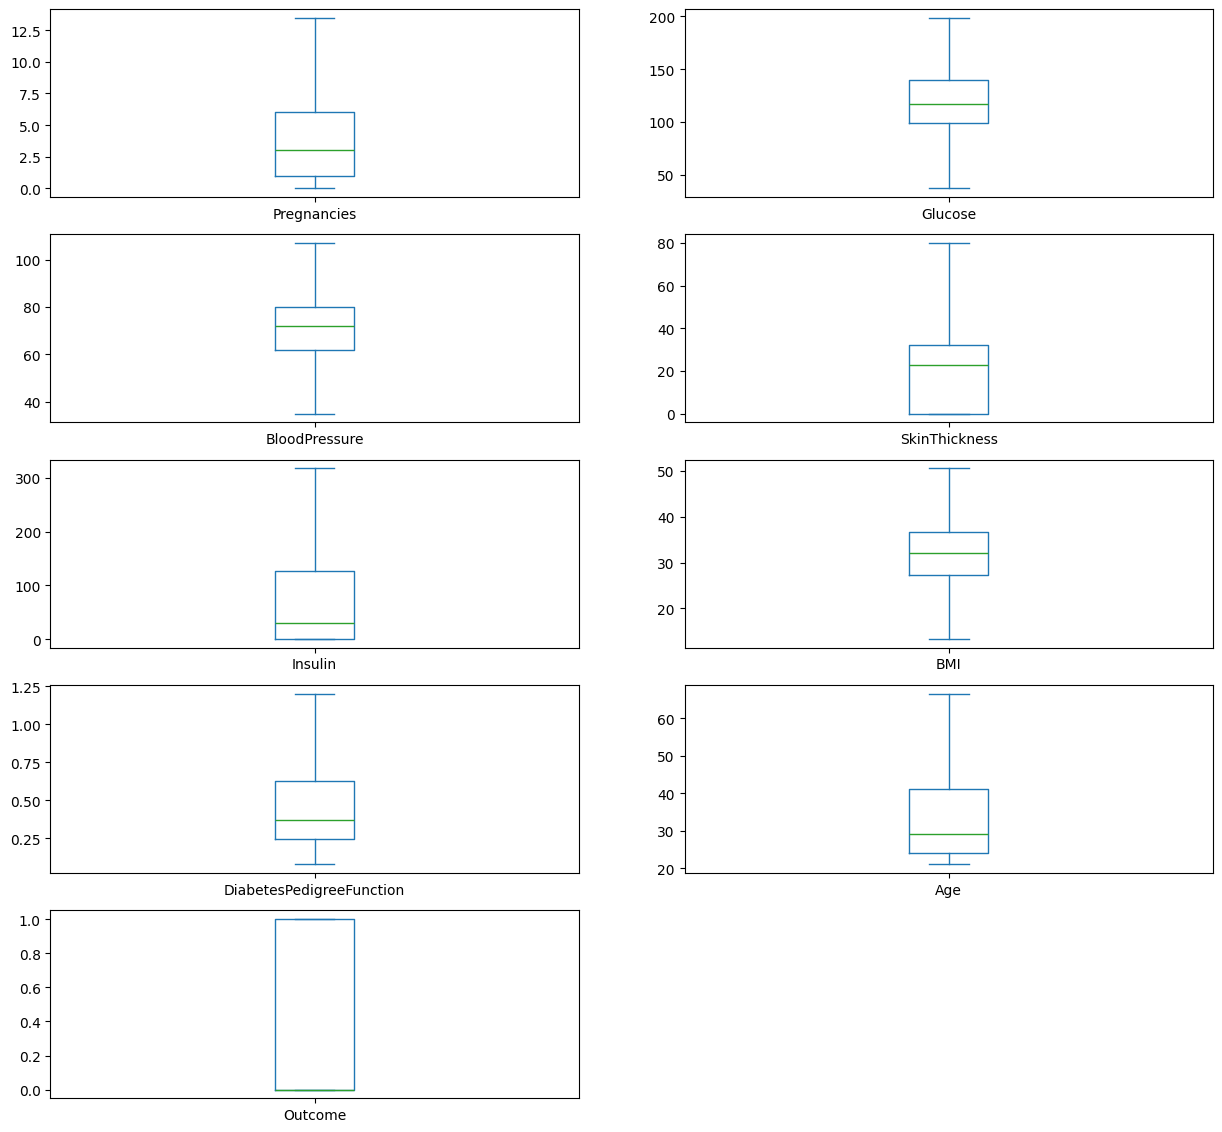

In [8]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

In [9]:
df_x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df_y = df['Outcome']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [11]:
reg = LogisticRegression()

In [12]:
reg.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred_lin = reg.predict(x_test)
print(y_pred_lin)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [14]:
from sklearn.metrics import classification_report

In [15]:
reg.score(x_test,y_test)

0.7857142857142857

In [16]:
print(classification_report(y_test,y_pred_lin))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [17]:
from sklearn.tree import DecisionTreeClassifier 

In [19]:
reg1 = DecisionTreeClassifier()

In [20]:
reg1.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred_lin = reg1.predict(x_test)
print(y_pred_lin)

[0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [22]:
reg1.score(x_test,y_test)

0.6883116883116883